# Basis Functions - Overview

Example created by Wilson Rocha Lacerda Junior

> **Looking for more details on NARMAX models?**
> For comprehensive information on models, methods, and a wide range of examples and benchmarks implemented in SysIdentPy, check out our book:
> [*Nonlinear System Identification and Forecasting: Theory and Practice With SysIdentPy*](https://sysidentpy.org/book/0%20-%20Preface/)
>
> This book provides in-depth guidance to support your work with SysIdentPy.


This notebook is not intended to find the best possible models for system identification. Instead, it serves as a simple demonstration of the basis functions available in SysIdentPy. The goal is to showcase each basis function with minimal code to illustrate how to use them within the SysIdentPy framework.

We use basic settings for model structure selection and parameter estimation, but for real-world applications, you may need to fine-tune the hyperparameters and explore more advanced methods to achieve optimal results.

For more details on SysIdentPy and how to fully leverage its capabilities, please refer to the [official documentation](https://sysidentpy.org/) and the [companion book](https://sysidentpy.org/book/0%20-%20Preface/).

## Introduction

In this example, we'll explore how to use SysIdentPy to apply various basis functions for system identification and model structure selection. We'll use a simulated dataset and apply the FROLS algorithm with different basis functions. Each basis function will be evaluated, and results will be plotted to compare their performance.

You can learn more about SysIdentPy's basis functions by referring to the official [documentation](https://sysidentpy.org/).

In [1]:
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.parameter_estimation.estimators import LeastSquares
from sysidentpy.utils.plotting import plot_results
from sysidentpy.model_structure_selection import FROLS
from sysidentpy import basis_function

## Generating Simulated Data

We begin by generating simulated Single-Input Single-Output (SISO) data using the get_siso_data function. This utility allows us to create realistic data for system identification tasks. For more details about how to customize the data generation process, visit the data [utilities documentation](https://sysidentpy.org/code/utils/#sysidentpy.utils.generate_data.get_siso_data).

In [2]:
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000, colored_noise=False, sigma=0.0001, train_percentage=90
)

## Basis Functions in SysIdentPy

SysIdentPy provides several basis functions that can be used in system identification. Basis functions transform input data into a feature space, enabling the identification of non-linear systems.

The following code snippet dynamically loads and instantiates each available basis function. You can explore the full list of basis functions available in SysIdentPy by visiting the [basis functions documentation](https://sysidentpy.org/code/basis-function/).

In [3]:
basis_function.__all__

['Bersntein',
 'Bilinear',
 'Fourier',
 'Legendre',
 'Laguerre',
 'Hermite',
 'HermiteNormalized',
 'Polynomial']

c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:40: FutureWarning:  `bias` and `n` are deprecated in 0.5.0 and will be removed in 0.6.0. Use `include_bias` and `degree`, respectively, instead.
  warnings.warn(message, FutureWarning, stacklevel=1)


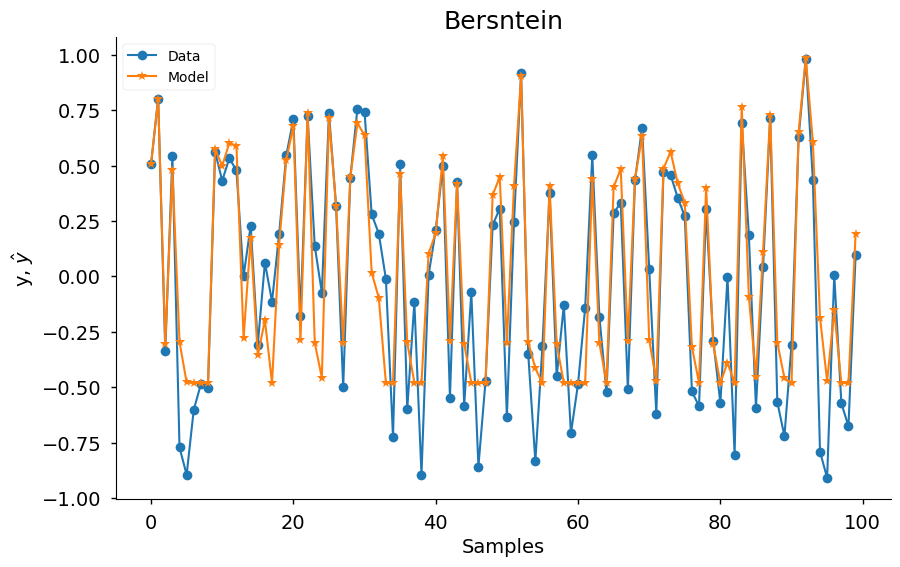

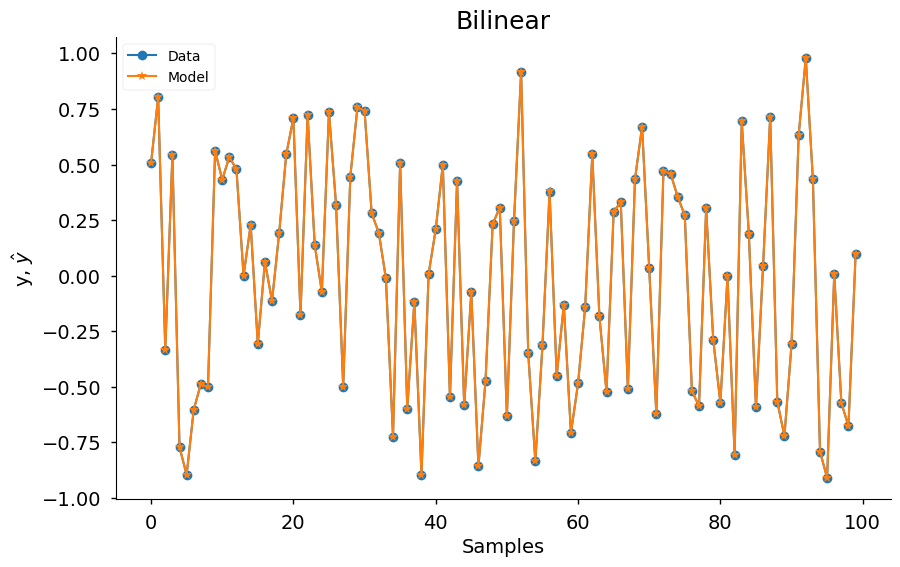

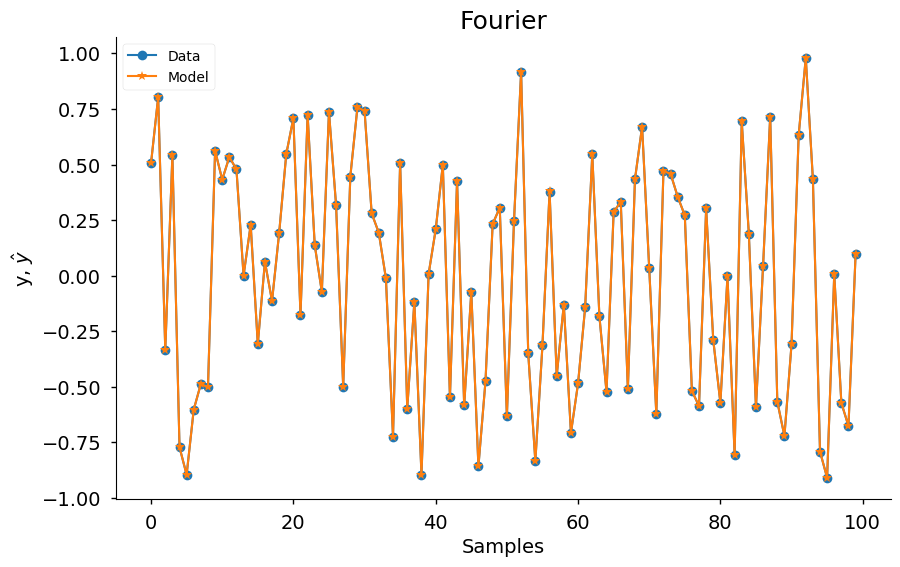

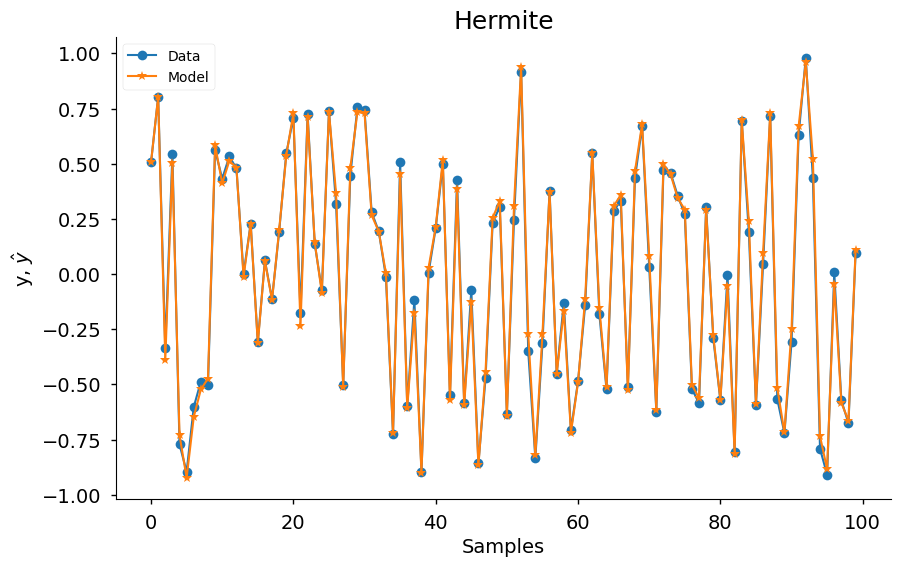

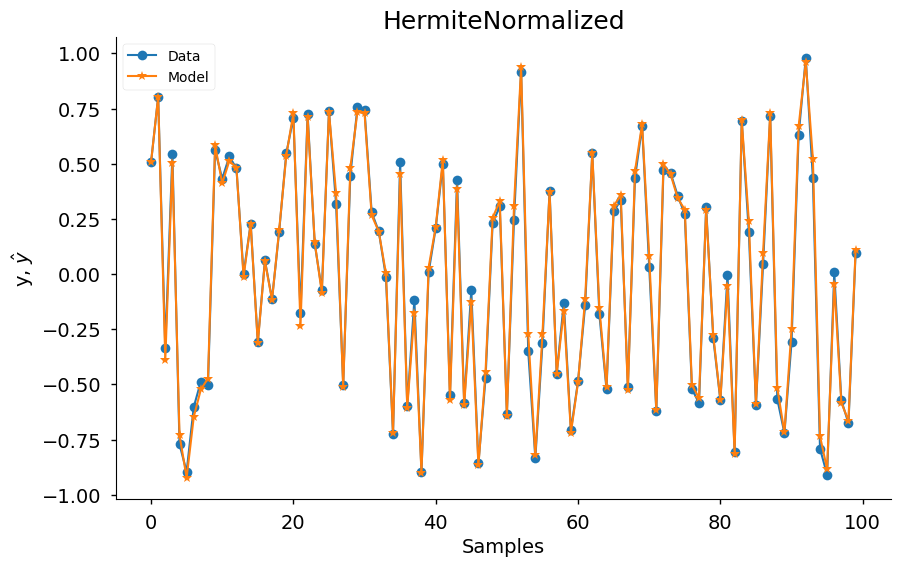

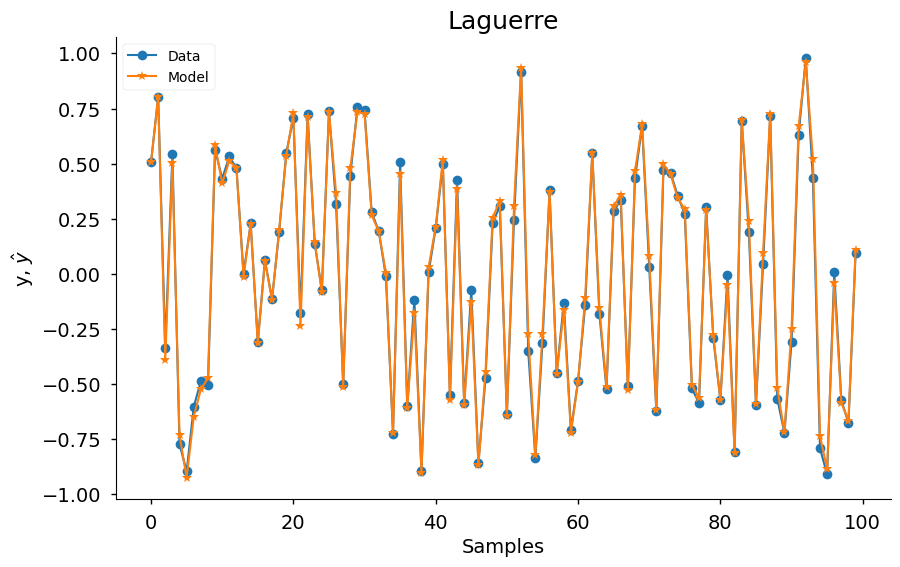

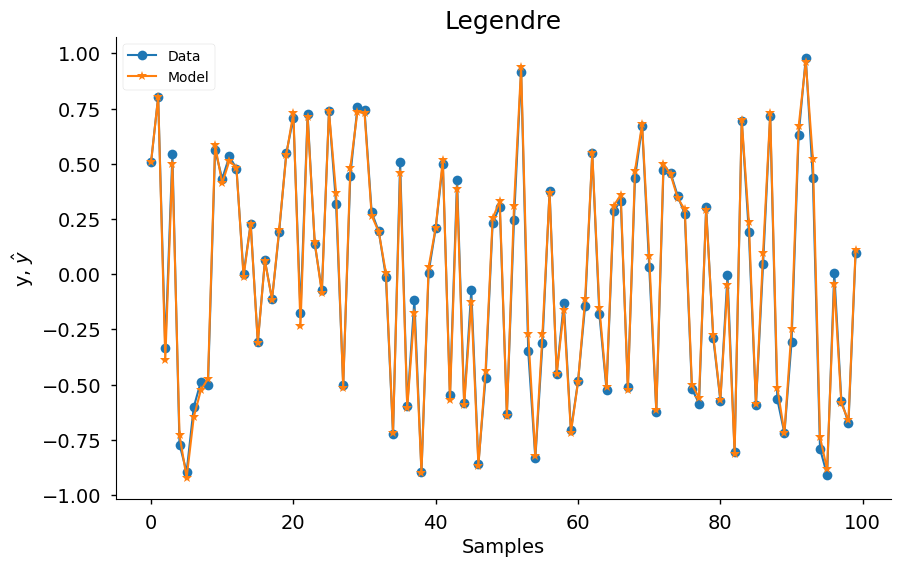

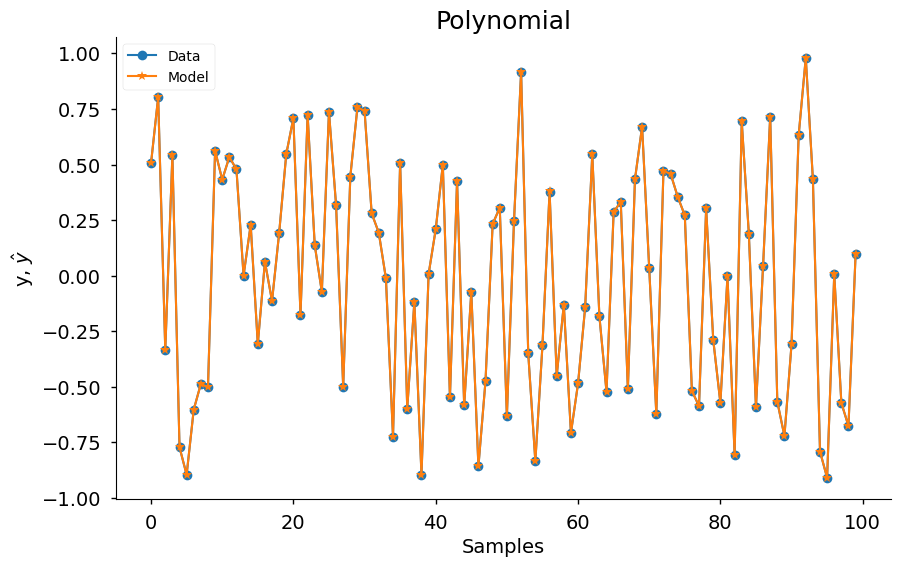

In [4]:
import inspect
from sysidentpy import basis_function

for basis_name, bf in inspect.getmembers(basis_function):
    if inspect.isclass(bf):
        estimator = LeastSquares()
        model = FROLS(
            order_selection=True,
            n_info_values=15,
            ylag=2,
            xlag=2,
            info_criteria="aic",
            estimator=estimator,
            err_tol=None,
            basis_function=bf(degree=5),
        )

        model.fit(X=x_train, y=y_train)
        yhat = model.predict(X=x_valid, y=y_valid)

        plot_results(
            y=y_valid,
            yhat=yhat,
            n=100,
            title=f"{basis_name}",
            xlabel="Samples",
            ylabel=r"y, $\hat{y}$",
            data_color="#1f77b4",
            model_color="#ff7f0e",
            marker="o",
            model_marker="*",
            linewidth=1.5,
            figsize=(10, 6),
            style="seaborn-v0_8-notebook",
            facecolor="white",
        )